In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *
from bias_utils import *
from photoz_plots import *

In [2]:
# 1-1-1-1 Stratified
bayesian_1111 = pd.read_csv('/data/HSC/3_model_comparison/Archive_Corrections/bayesian_predictions_2.5_[1, 1, 1, 1]_v2.csv')
ensemble_1111 = pd.read_csv('/data/HSC/3_model_comparison/Archive_Corrections/ensemble_predictions_2.5_[1, 1, 1, 1]_v2.csv')
rf_1111 = pd.read_csv('/data/HSC/3_model_comparison/Archive/random_forest_predictions_2.5_[1, 1, 1, 1]_v2.csv')

ensemble_1111.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_1111.drop(columns=['Unnamed: 0'], inplace=True)
rf_1111.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_1111 = ensemble_1111['predicted_redshift']
bayesian_pred_1111 = bayesian_1111['predicted_redshift']
rf_pred_1111 = rf_1111['predicted_redshift']

In [3]:
# Control
bayesian_ctrl = pd.read_csv('/mnt/data/HSC/3_model_comparison/bayesian_predictions_2.5_control_v2.csv')
ensemble_ctrl = pd.read_csv('/mnt/data/HSC/3_model_comparison/ensemble_predictions_2.5_control_v2.csv')
rf_ctrl = pd.read_csv('/data/HSC/3_model_comparison/random_forest_predictions_2.5_control_v2.csv')

ensemble_ctrl.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_ctrl.drop(columns=['Unnamed: 0'], inplace=True)
rf_ctrl.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_ctrl = ensemble_ctrl['predicted_redshift']
bayesian_pred_ctrl = bayesian_ctrl['predicted_redshift']
rf_pred_ctrl = rf_ctrl['predicted_redshift']

In [4]:
# 1-1-1-1 Oversampled
bayesian_over = pd.read_csv('/mnt/data/HSC/3_model_comparison/bayesian_predictions_2.5_[1, 1, 1, 1]_v2.csv')
ensemble_over = pd.read_csv('/mnt/data/HSC/3_model_comparison/ensemble_predictions_2.5_[1, 1, 1, 1]_v2.csv')
rf_over = pd.read_csv('/data/HSC/3_model_comparison/random_forest_predictions_2.5_[1, 1, 1, 1]_v2.csv')

ensemble_over.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_over.drop(columns=['Unnamed: 0'], inplace=True)
rf_over.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_over = ensemble_over['predicted_redshift']
bayesian_pred_over = bayesian_over['predicted_redshift']
rf_pred_over = rf_over['predicted_redshift']

In [5]:
ensemble_true_1111 = ensemble_1111['specz_redshift']
bayesian_true_1111 = bayesian_1111['specz_redshift']
rf_true_1111 = rf_1111['specz_redshift']

ensemble_true_ctrl = ensemble_ctrl['specz_redshift']
bayesian_true_ctrl = bayesian_ctrl['specz_redshift']
rf_true_ctrl = rf_ctrl['specz_redshift']

ensemble_true_over = ensemble_over['specz_redshift']
bayesian_true_over = bayesian_over['specz_redshift']
rf_true_over = rf_over['specz_redshift']

In [6]:
ensemble_true_1111 = pd.Series(ensemble_true_1111)
bayesian_true_1111 = pd.Series(bayesian_true_1111)
rf_true_1111 = pd.Series(rf_true_1111)

ensemble_true_ctrl = pd.Series(ensemble_true_ctrl)
bayesian_true_ctrl = pd.Series(bayesian_true_ctrl)
rf_true_ctrl = pd.Series(rf_true_ctrl)

ensemble_true_over = pd.Series(ensemble_true_over)
bayesian_true_over = pd.Series(bayesian_true_over)
rf_true_over = pd.Series(rf_true_over)

In [14]:
metrics_ensemble_1111 = get_point_metrics(ensemble_pred_1111, ensemble_true_1111, binned=True)
metrics_ensemble_ctrl = get_point_metrics(ensemble_pred_ctrl, ensemble_true_ctrl, binned=True)
metrics_ensemble_over = get_point_metrics(ensemble_pred_over, ensemble_true_over, binned=True)

# metrics_bayesian_1111 = get_point_metrics(bayesian_pred_1111, bayesian_true_1111, binned=True) don't have this data
metrics_bayesian_ctrl = get_point_metrics(bayesian_pred_ctrl, bayesian_true_ctrl, binned=True)
metrics_bayesian_over = get_point_metrics(bayesian_pred_over, bayesian_true_over, binned=True)

metrics_rf_1111 = get_point_metrics(rf_pred_1111, rf_true_1111, binned=True)
metrics_rf_ctrl = get_point_metrics(rf_pred_ctrl, rf_true_ctrl, binned=True)
metrics_rf_over = get_point_metrics(rf_pred_over, rf_true_over, binned=True)

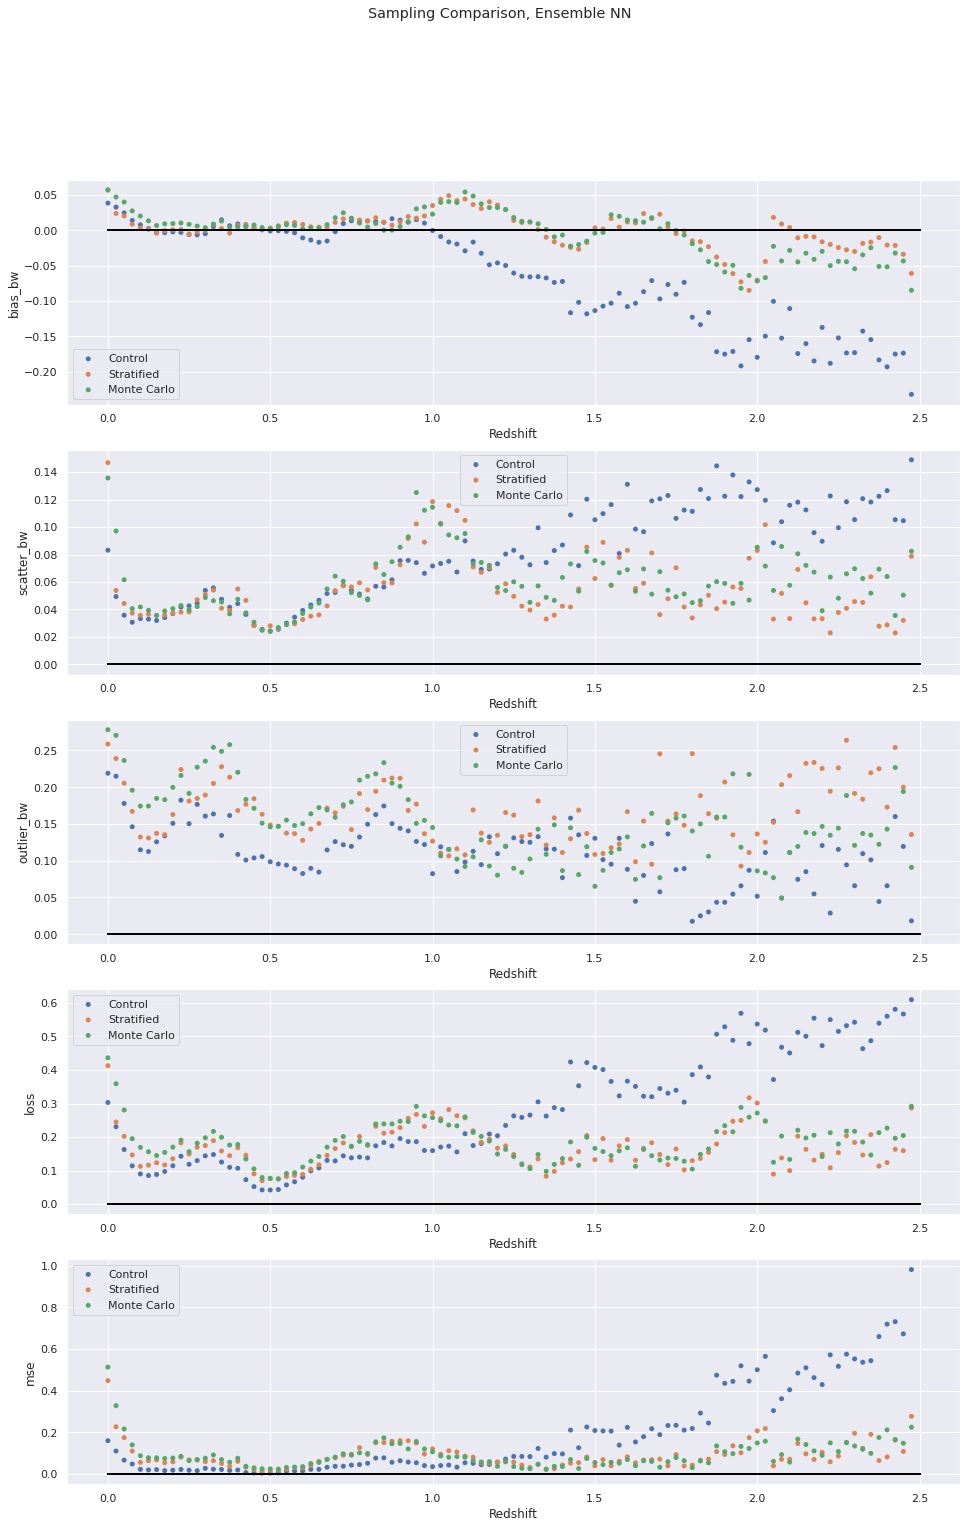

In [8]:
plot_comparison([metrics_ensemble_ctrl, metrics_ensemble_1111, metrics_ensemble_over], ['Control', 'Stratified', 'Monte Carlo'], 'Sampling Comparison, Ensemble NN', 2.5)

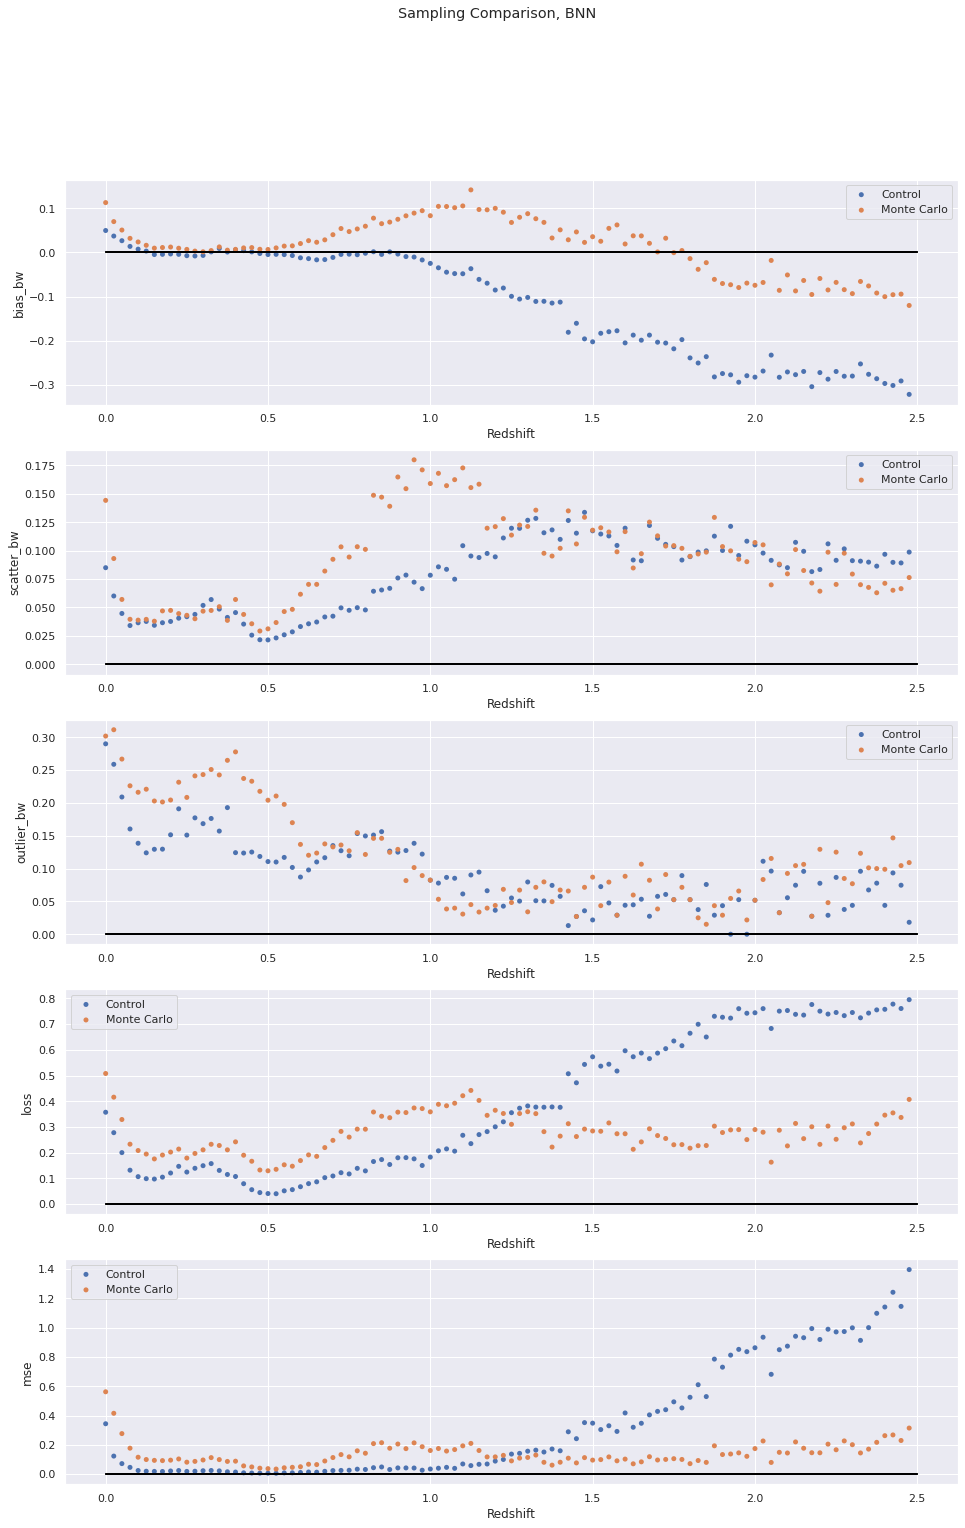

In [15]:
plot_comparison([metrics_bayesian_ctrl, metrics_bayesian_over], ['Control', 'Monte Carlo'], 'Sampling Comparison, BNN', 2.5)

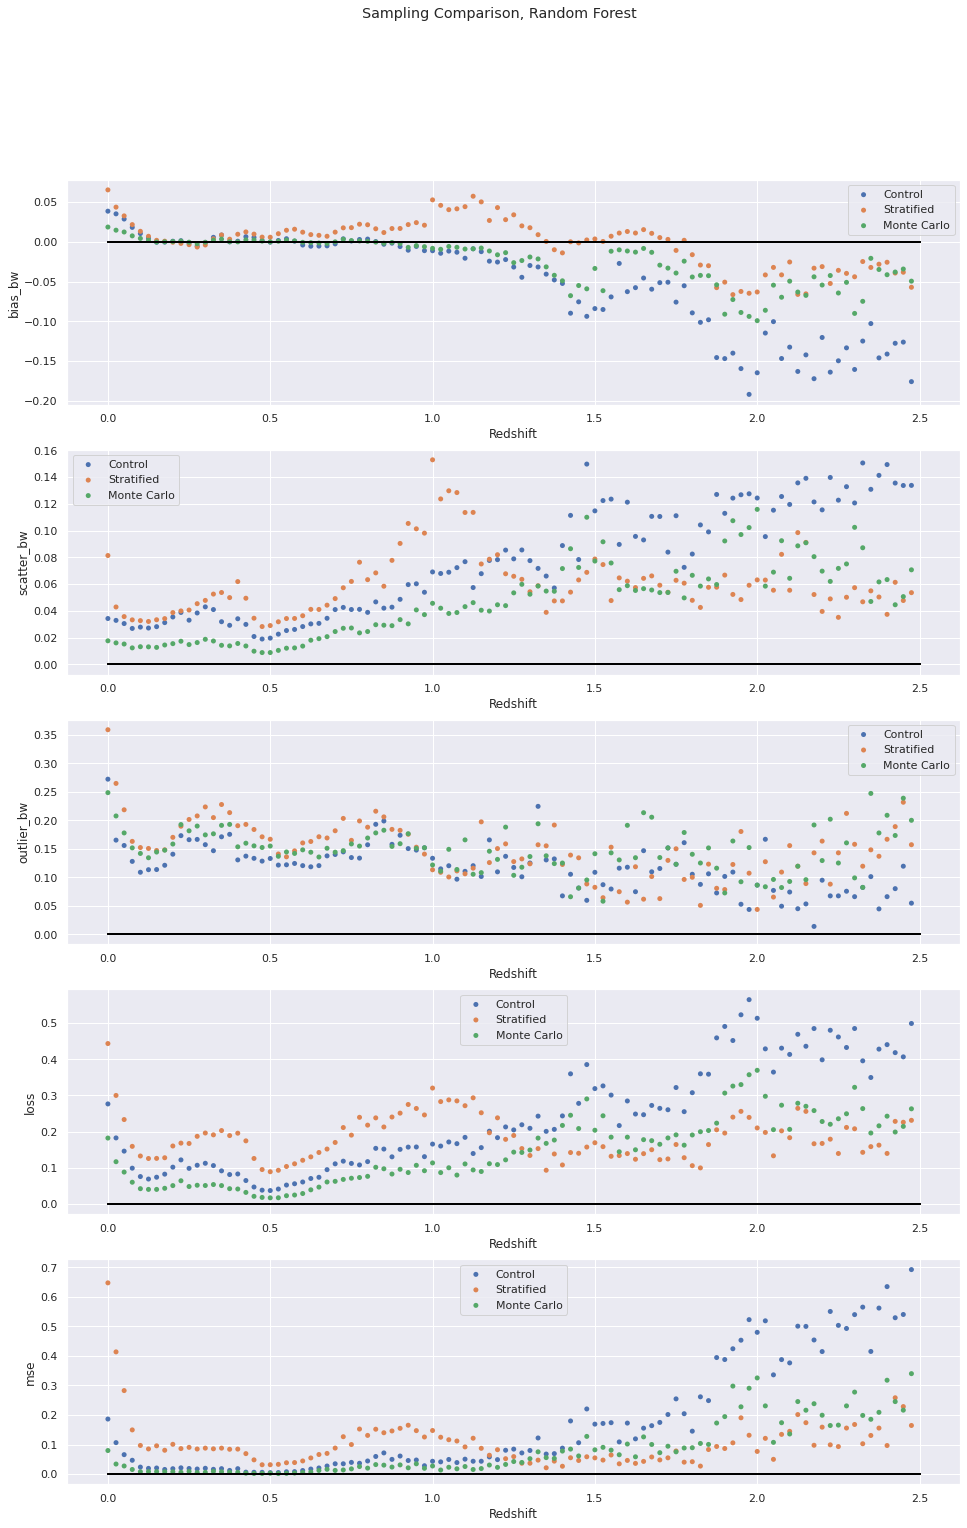

In [11]:
plot_comparison([metrics_rf_ctrl, metrics_rf_1111, metrics_rf_over], ['Control', 'Stratified', 'Monte Carlo'], 'Sampling Comparison, Random Forest', 2.5)